# RNA velocity per pool  
### Analysis template for Richard

In [1]:
import scvelo as scv
import scanpy as sc
import pandas as pd
import os
from glob import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

##### MONIQUE SEE HERE 
fitted_h5 = "/covid/scvelo/fitted/run_200423/cMono.h5ad"

## Load data with velocity fit

In [3]:
# IMPORT
top_n = 100 # NUMBER OF TOP LIKELIHOOD GENES
adata = sc.read(fitted_h5)

In [4]:
adata

AnnData object with n_obs × n_vars = 14667 × 60662
    obs: 'B2M-1', 'B7-H4', 'BLR1', 'BTLA-1', 'C3BR', 'C3DR', 'C5AR1-1', 'CCR3-1', 'CCR4-1', 'CCR5-1', 'CCR6-1', 'CD137L', 'CD14-1', 'CD15', 'CD158', 'CD158b', 'CD158e1', 'CD158f', 'CD16', 'CD163-1', 'CD19-1', 'CD198', 'CD1A-1', 'CD1C-1', 'CD1D-1', 'CD2-1', 'CD207-1', 'CD209-1', 'CD22-1', 'CD226-1', 'CD235ab', 'CD24-1', 'CD244-1', 'CD27-1', 'CD274-1', 'CD28-1', 'CD3', 'CD33-1', 'CD34-1', 'CD36-1', 'CD38-1', 'CD4-1', 'CD40-1', 'CD40LG-1', 'CD44-1', 'CD45RA', 'CD45RO', 'CD47-1', 'CD5-1', 'CD52-1', 'CD58-1', 'CD66a_c_e', 'CD69-1', 'CD7-1', 'CD70-1', 'CD79B-1', 'CD8', 'CD80-1', 'CD81-1', 'CD82-1', 'CD83-1', 'CD8A-1', 'CD96-1', 'CDH1-1', 'CDH5-1', 'CEACAM8-1', 'CLEC12A-1', 'CLEC4C-1', 'CLEC9A-1', 'COVID_status', 'CTLA4-1', 'CX3CR1-1', 'CXCR4-1', 'D0_to_death', 'DPP4-1', 'DR3', 'EGFR-1', 'ENTPD1-1', 'EPCAM-1', 'FASLG-1', 'FCER1a', 'FCER2-1', 'FCGR1A-1', 'FCGR2A-1', 'FCRL4-1', 'FCRL5-1', 'GARP', 'GGT1-1', 'HAVCR2-1', 'HLA-A-1', 'HLA-A2', 'HLA-

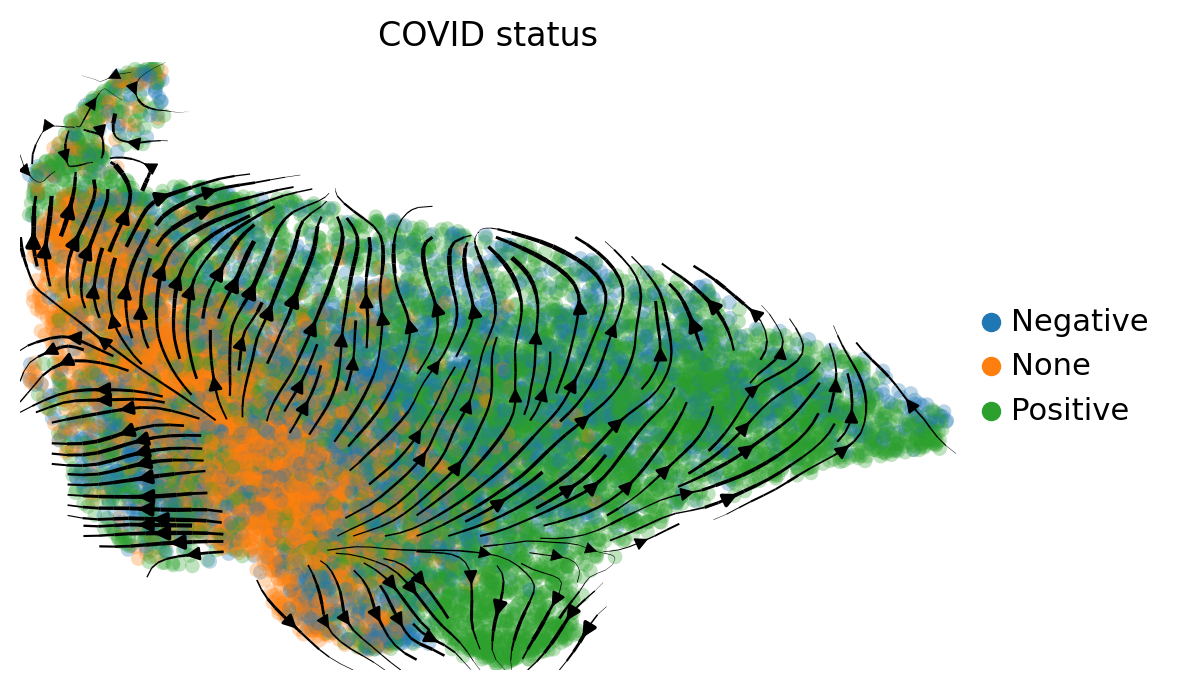

In [8]:
# emedding and plot
scv.pl.velocity_embedding_stream(adata, basis='umap', color='DESIRED COVARIATE HERE', legend_loc='right margin') # MONIQUE SEE HERE

In [ ]:
# top velocity genes
scv.tl.rank_dynamical_genes(adata, groupby='DESIRED COVARIATE HERE') # MONIQUE SEE HERE

In [15]:
# top likelihood genes
top_lkl = adata.var['fit_likelihood'].sort_values(ascending=False).index[:top_n]

In [ ]:
# latent time
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)

In [ ]:
# Sorting by latent time
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='DESIRED COVARIATE HERE', n_convolve=100) # MONIQUE SEE HERE

# Velocity speed and confidence

In [ ]:
# Estimate confidence and speed
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
df = adata.obs.groupby('DESIRED COVARIATE HERE')[keys].mean().T # MONIQUE SEE HERE

In [ ]:
df.T

In [ ]:
sns.barplot(x=df.T.index, y=df.T.velocity_length, ci=None).set_title("velocity_length")

In [ ]:
sns.barplot(x=df.T.index, y=df.T.velocity_confidence, ci=None).set_title("velocity_confidence")